# EDA zbioru danych Titanic

In [27]:
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

## Opis danych

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę ("1.0" - ocalały, "0.0" - ofiara katastrofy)
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

![titanic](https://ocdn.eu/pulscms-transforms/1/D6Gk9kpTURBXy9iNDA3ODkxNWUyZTQ5OGUyZmQ5MmVjMjA1Nzk3Y2IxNy5qcGeTlQMAAM0CgM0BaJUCzQSwAMPDkwmmMjNmMjYzBt4AAaEwAQ/wystawa-titanic-w-warszawie-prawdziwa-historia-prawdziwe-eksponaty.jpeg)

## Wstępna analiza danych

Na samym początku zostanie przeprowadzona krótka analiza ogólnego zarysu zbioru danych, m.in. sprawdzając losowe rekordy lub wartości unikatowe.

### Losowe 5 rzędów

In [14]:
df = pd.read_csv('titanic_dataset.csv', sep=',')

sample_df = df.sample(n=5, random_state=123)
html = sample_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
3.0,0.0,"Willer, Mr. Aaron (""Abi Weller"")",male,NaN,0.0,0.0,3410,8.7125,NaN,S,NaN,NaN,NaN
3.0,0.0,"Baccos, Mr. Raffull",male,20.0,0.0,0.0,2679,7.2250,NaN,C,NaN,NaN,NaN
2.0,1.0,"Herman, Miss. Alice",female,24.0,1.0,2.0,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ"
1.0,0.0,"Cumings, Mr. John Bradley",male,39.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,"New York, NY"
3.0,0.0,"Dika, Mr. Mirko",male,17.0,0.0,0.0,349232,7.8958,NaN,S,NaN,NaN,NaN


### Wartości unikatowe

In [12]:
unique_values_df = df.nunique().reset_index()
unique_values_df.columns = ['Kolumna', 'Liczba unikatowych wartości']
unique_values_df
html = unique_values_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

Kolumna,Liczba unikatowych wartości
pclass,3
survived,2
name,1307
sex,2
age,98
sibsp,7
parch,8
ticket,929
fare,281
cabin,186


**Wnioski:**
* ponad 2200 ludzi wzięło udział w rejsie, natomiast dostarczone dane zawierają informacje tylko dla 1309 osób 

### Statystyki opisowe

In [15]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00
survived,1309.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1046.0,29.88,14.41,0.17,21.0,28.00,39.00,80.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1308.0,33.30,51.76,0.00,7.9,14.45,31.28,512.33
body,121.0,160.81,97.70,1.00,72.0,155.00,256.00,328.00


### Ilość pasażerów w poszczególnej klasie

In [9]:
passengers_per_class_df = df.groupby('pclass', as_index = False)['name'].count()
html = passengers_per_class_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

pclass,name
1.0,323
2.0,277
3.0,709


### Stosunek liczby ocalałych do ofiar oraz informacja ile ciał zostało odnalezionych

In [10]:
survived_check_df = df.groupby('survived', as_index = False)[['name', 'body']].count()
html = survived_check_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

survived,name,body
0.0,809,121
1.0,500,0


**Wnioski:**
* najwięcej pasażerów płynęło w najuboższej - klasie 3 (aż 709 na 1309 osób)
* w rejsie wzięło udział całe spektrum wiekowe, od niemowlęcia (do 1 roku życia) aż po seniorów (o maksymalnym wieku - 80 lat),
* maksymalnie bilet kosztował 512.33 dolarów, przy czym średnia wartość biletu wyniosła 33.3 dolary,
* z danych wynika, że w rejsie poniosło śmierć 809 osób, natomiast tylko 121 ciał zostało odnalezionych.
* tylko 500 osób przeżyło katastofę.

### Stosunek procentowy odnalezionych ciał do wszystkich ofiar katastrofy

In [128]:
#wyliczam jaki procent ludzi przeżyło katastrofe
survived_passengers = df['name'][df['survived'] == 1].count() #500
percentage_survived_passengers = ((survived_passengers / len(df)) * 100).round(2) #38.17%
#wyliczam jaki procent ciał odnaleziono
founded_bodies = df['body'].count() #121
not_survived_passengers = df['name'][df['survived'] == 0].count()
percentage_founded_bodies = ((founded_bodies / not_survived_passengers) * 100).round(2) #14.96%
survived_df = pd.DataFrame({ ' percentage value [%]' : [percentage_survived_passengers, percentage_founded_bodies]},
                          index = ['survived passengers', 'founded bodies'])
survived_df

,percentage value [%]
survived passengers,38.17
founded bodies,14.96


### Podsumowanie wstępnej analizy:
* tylko 38% pasażerów przeżyło katastrofę,
* tylko 15% ciał zostało odnalezionych.

## Analiza brakujących wartości

Sprawdzenie czy w danym zbiorze danych znajdują się wartości brakujące, które mogłyby zaburzyć końcowe wyniki.

### Ilościowe i procentowe zestawienie brakujących wartości w analizowanym zbiorze danych:

In [135]:
quantity_missing_values = df.isnull().sum()
percentage_missing_values = ((quantity_missing_values) / len(df)) * 100
na_df = pd.DataFrame({ 
    'Quantity missing values' : quantity_missing_values,
    'Percentage missing values' : percentage_missing_values.round(2)})
na_df.sort_values(by = 'Percentage missing values', ascending = False)

,Quantity missing values,Percentage missing values
body,1189,90.76
cabin,1015,77.48
boat,824,62.90
home.dest,565,43.13
age,264,20.15
embarked,3,0.23
fare,2,0.15
pclass,1,0.08
survived,1,0.08
name,1,0.08


### Podsumowanie analizy wartości brakujących:
* najwięcej brakujących wartości wystąpiło dla numeru ciała (90.76%), bowiem jedynie 121 ciał zostało odnalezionych wśród 809 ofiar (co ukazują wnioski płynące ze wstępnej analizy).

## Analiza pojedynczych wartości

Żeby jak najlepiej zrozumieć wszelkie korelacje pomiędzy danymi oraz ich istotność - należy najpierw zgłębić wiedzę dotyczącą pojedynczych rekordów.

* histogram 'age': potwierdza, że w rejsie wzięło udział całe spektrum wiekowe, ale najwięcej pasażerów było w młodym wieku (ok. 20-40 lat),
* histogram 'surived': potwierdza, że zdecydowanie więcej ludzi nie przeżyło katastrofy,
* histogramy 'pclass' oraz 'fare': potwierdzają, że najwięcej ludzi podróżowało w klasie 3 - gdzie ceny biletów były najniższe.

#### Analiza histogramów

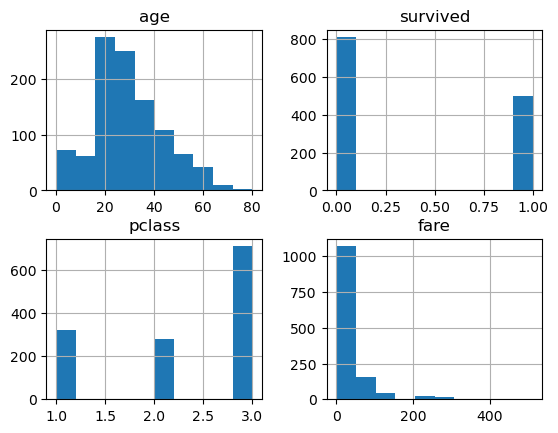

In [105]:
df.hist(column = ['age', 'survived', 'pclass', 'fare']);

* histogramy 'sibsp' oraz 'parch': potwierdzają, że najwięcej osób podróżowało w pojedynke (bez rodziny).


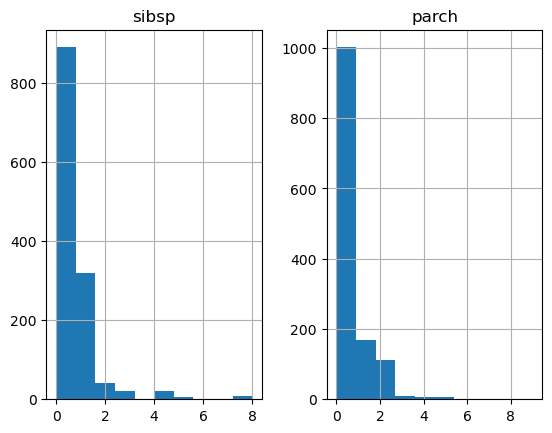

In [107]:
df.hist(column = ['sibsp', 'parch']);

#### Najczęściej występujące imiona

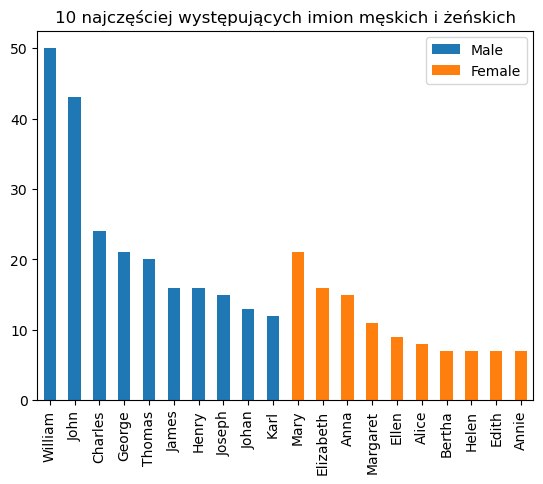

In [456]:
#usuwam wartości brakujące w kolumnach imion i płci
df = df.dropna(subset = ['name', 'sex'])
#wyodrębniam pierwsze męskie imię do nowej kolumny 'male first name'
df['male first name'] = df[df['sex'] == 'male']['name'].str.split('.').str[1].str.split(' ').str[1]
#wyodrębniam pierwsze żeńskie imię do nowej kolumny 'female first name' - dla mężatek
df['female married first name'] = df[df['sex'] == 'female']['name'].str.split('(').str[1].str.split(' ').str[0]
#wyodrębniam pierwsze żeńskie imię do nowej kolumny 'female all first name' - dla wszystkich kobiet
df['female all first names'] = df['female married first name'].fillna(df['name'].str.split('.').str[1].str.split(' ').str[1])
#tworzę nowe DF z 10 najczętszymi imionami męskimi oraz żeńskimi
top_male_names_df = df[df['sex'] == 'male']['male first name'].value_counts().nlargest(10)
top_female_names_df = df[df['sex'] == 'female']['female all first names'].value_counts().nlargest(10)
#scalam powyższe dwa DF do jednego, wypełniam brakujące dane '0'
top_names_df = pd.concat([top_male_names_df, top_female_names_df], axis = 1, keys = ['Male', 'Female']).fillna(0)
#rysuję barplot
top_names_df.plot(kind = 'bar', stacked = True, title = '10 najczęściej występujących imion męskich i żeńskich');

#### Najczętsze cele podróży (miasta)

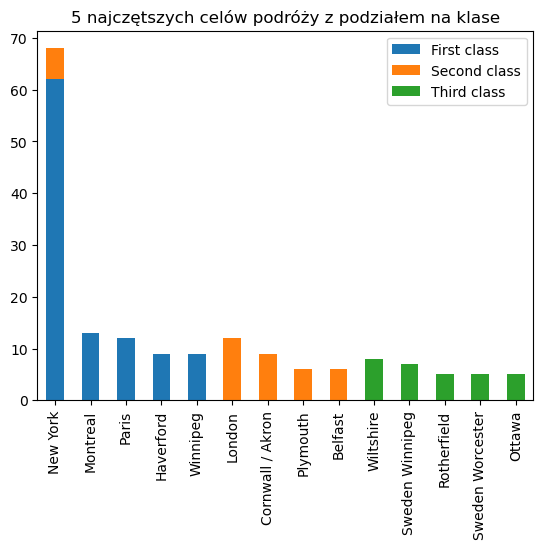

In [457]:
df = df.dropna(subset = ['home.dest', 'pclass'])
df['city'] = df['home.dest'].str.split(',').str[0]
top_1class_cities_df = df[df['pclass'] == 1.0]['city'].value_counts().head(5)
top_2class_cities_df = df[df['pclass'] == 2.0]['city'].value_counts().head(5)
top_3class_cities_df = df[df['pclass'] == 3.0]['city'].value_counts().head(5)
top_cities_df = pd.concat([top_1class_cities_df, top_2class_cities_df, top_3class_cities_df], axis = 1, keys = 
                          ['First class', 'Second class', 'Third class']).fillna(0)
top_cities_df.plot(kind = 'bar', stacked = True, title = '5 najczętszych celów podróży z podziałem na klase');

#### Najczęściej występujące roczniki wśród kobiet i mężczyzn oraz najliczniejsze grupy wiekowe

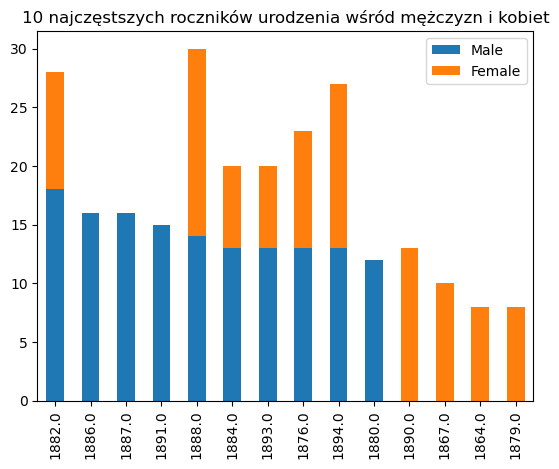

In [458]:
df = df.dropna(subset = ['age', 'sex'])
df['year of birth'] = (1912 - df['age'])
top_male_years_df = df[df['sex'] == 'male']['year of birth'].value_counts().head(10)
top_female_years_df = df[df['sex'] == 'female']['year of birth'].value_counts().head(10)
top_years_df = pd.concat([top_male_years_df, top_female_years_df], axis = 1, keys = ['Male', 'Female']).fillna(0)
top_years_df.plot(kind = 'bar', stacked = True, title = '10 najczęstszych roczników urodzenia wśród mężczyzn i kobiet');

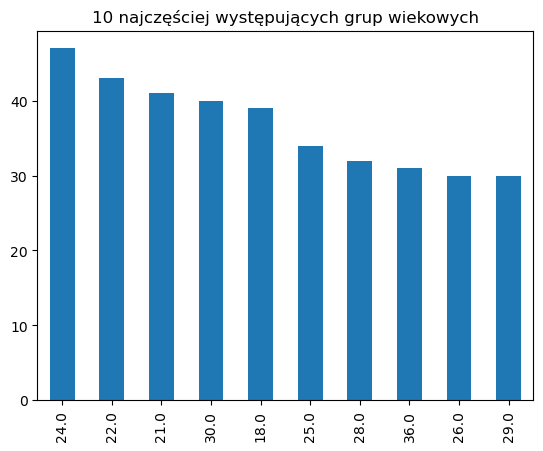

In [142]:
top_ages = df['age'].value_counts().head(10)
top_ages.plot(kind = 'bar', title = '10 najczęściej występujących grup wiekowych');

#### Sprawdzenie czy pasażerowanie częściej płynęli z rodziną czy w pojedynkę

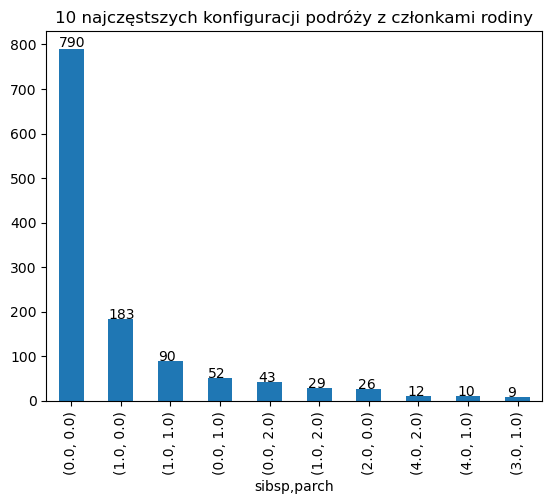

In [167]:
#sprawdzam ile ludzi podróżowało z członkami rodziny
family_members = df[['sibsp', 'parch']].value_counts().head(10)
family_members_plot = family_members.plot(kind = 'bar', title = '10 najczęstszych konfiguracji podróży z członkami rodiny')
#dodanie wartości nad wykresami
for values in family_members_plot.patches:
    family_members_plot.annotate(str(int(values.get_height())), (values.get_x() * 1.005, values.get_height() * 1.005))


### Podsumowanie analizy wartości pojedynczych:
* najwięcej podróżujących mężczyzn miało na imie: 'William', natomiast kobiet: 'Mary',
* najczęściej obranym kursem było miasto docelowe: 'New York' - można również zauważyć, że podróżowali tam w większości pasażerowie z 1 klasy - o czym mogła świadczyć najwyższa cena biletu, gdyż Nowy Jork był ostatnim celem podróży.
* w rejsie wzięło udział najwięcej młodych osób (wśród obydwu płci) o rocznikach: 1888, 1890, 1891 i 1882, natomiast 10 najczęściej występujących grup wiekowych to byli ludzie w wieku: od 18 do 36 lat,
* aż 790 osób podróżowało samodzielnie (bez członków rodziny).


#### Po wcześniejszych transformacjach (wykorzystanych do generowania poszczególnych wykresów), usuwam nowopowstałe kolumny i przywracam pierwotny format danych

In [462]:
df.drop(columns = ['male first name', 'female married first name', 'female all first names', 'city',
                   'year of birth'], inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,3.0,0.0,"Gustafsson, Mr. Johan Birger",male,28.0000,2.0,0.0,3101277,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
839,3.0,0.0,"Gustafsson, Mr. Karl Gideon",male,19.0000,0.0,0.0,347069,7.7750,NaN,S,NaN,NaN,"Myren, Sweden New York, NY"
1063,3.0,0.0,"Nirva, Mr. Iisakki Antino Aijo",male,41.0000,0.0,0.0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
1089,3.0,0.0,"Olsvigen, Mr. Thor Anderson",male,20.0000,0.0,0.0,6563,9.2250,NaN,S,NaN,89.0,"Oslo, Norway Cameron, WI"


## Analiza korelacji

Po wstępnym oszacowaniu zarysu danych, zgłębieniu pojedynczych rekordów oraz zweryfikowaniu wartości brakujących - istnieje możliwość zrozumieć korelacyjność danych.

### Macierz korelacji

* nie wykazano pełnych korelacji (biskich -1 albo 1),
* największa korelacja ujemna występuje dla zależności: fare-pclass (-0.51) oraz age-pclass (-0.42),
* największa korelacja dodatnia występuje dla zależności: parch-sibsp (0.38).

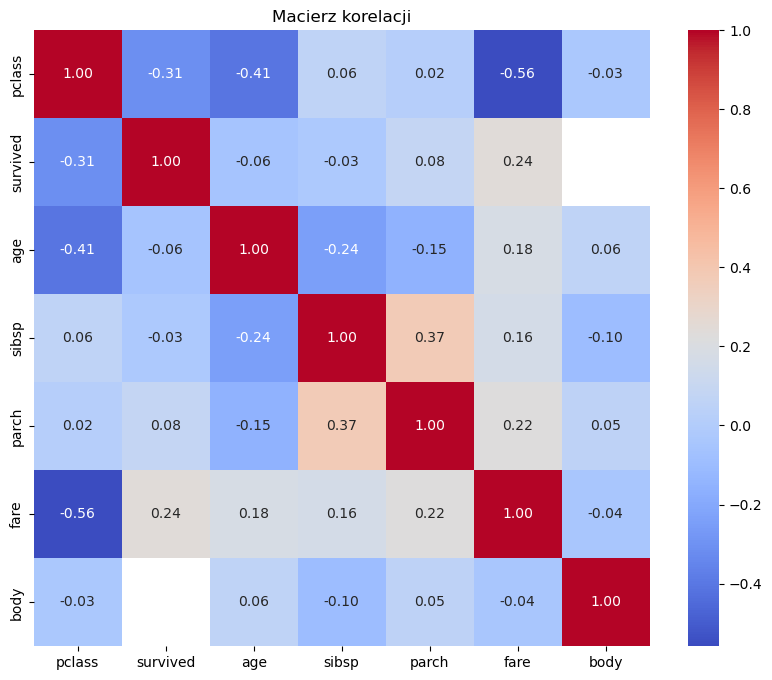

In [28]:
numeric_df = df.select_dtypes(include='number')

# Oblicz korelację tylko dla wartości numerycznych
correlation_matrix = numeric_df.corr()

# Ustawowanie rozmiaru wykresu
plt.figure(figsize=(10, 8))

# Tworzenie heat mapy
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Dodanie tytułu, osi
plt.title('Macierz korelacji')
plt.show()

#### Wpływ wieku na posiadaną klasę

* w tym przypadku korelacja ujemna polega na tym, że im człowiek starszy tym dysponuje przeważnie większą liczbą pieniędzy -> zatem na klasę 1 (najdroższą) stać było więcej ludzi starszych, dlatego wybierali oni tę komfortową opcję rejsu.

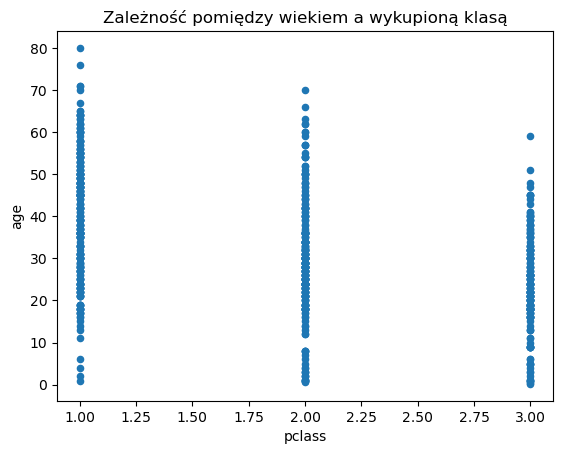

In [471]:
df.plot(kind = 'scatter', x = 'pclass', y = 'age', title = 'Zależność pomiędzy wiekiem a wykupioną klasą');

#### Cena biletu a wykupiona klasa

* w tym przypadku korelacja ujemna polega na tym, że im cena biletu była wyższa tym większa możliwość wykupu rejsu najwyższą klasą, czyli klasą 1.

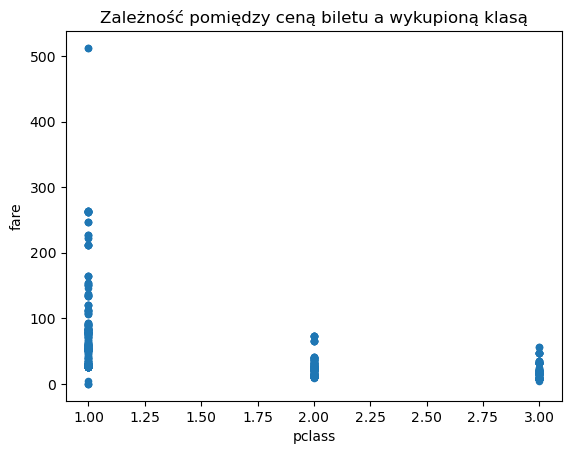

In [472]:
df.plot(kind = 'scatter', x = 'pclass', y = 'fare', title = 'Zależność pomiędzy ceną biletu a wykupioną klasą');

#### Zależności rodzinne

* w tym przypadku korelacja dodatnia polega na tym, że jak już ktoś nie podróżował w pojedynke to większe było prawdopodobieństwo, iż zabierze ze sobą większą część rodziny -> czyli np. jeśli zabrał ze sobą dzieci to zapewne również małżonka.

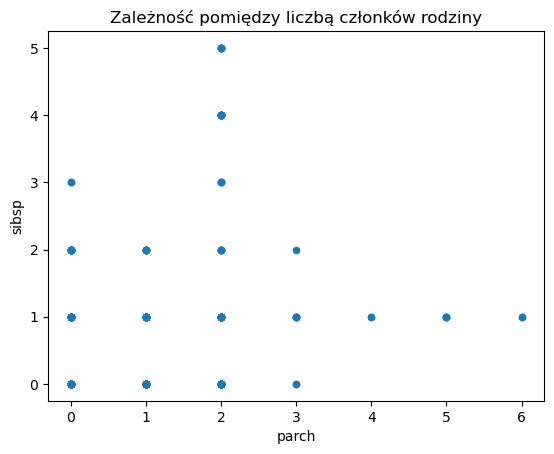

In [474]:
df.plot(kind = 'scatter', x = 'parch', y = 'sibsp', title = 'Zależność pomiędzy liczbą członków rodziny');

#### Ilu pasażerów przeżyło katastrofę ze względu na klasę (w ujęciu procentowym), czyli wpływ posiadanej klasy na przeżywalność katastrofy

* analizując wykres kołowy można zauważyć, że **największe szanse na uratowanie, miały osoby z 1 klasy -> mogło to być spowodowane faktem, że mieli oni priorytet przy ewakuacji na łodzie ratunkowe w stosunku do pasażerów z klasy 2 oraz 3.**

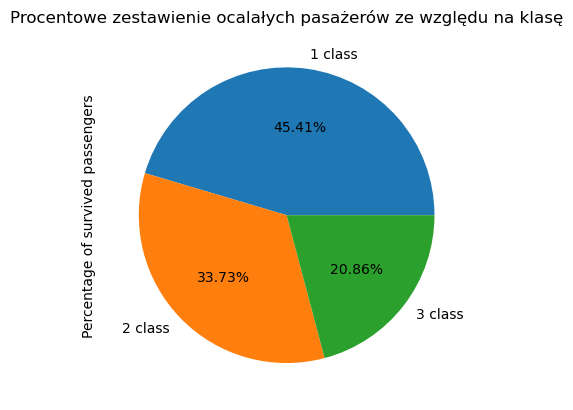

In [476]:
#Liczba wszystkich pasażerów oraz z uwzględnieniem podziału na klase:
number_of_all_passengers = df['pclass'].count() #1309
number_of_1class_passengers = df['pclass'][df['pclass'] == 1].count() #323
number_of_2class_passengers = df['pclass'][df['pclass'] == 2].count() #277
number_of_3class_passengers = df['pclass'][df['pclass'] == 3].count() #709
#Liczba wszystkich OCALAŁYCH pasażerów oraz z uwzględnieniem podziału na klase:
number_of_survived_all_passengers = df['pclass'][df['survived'] == 1].count() #500
number_of_survived_1class_passengers = df['pclass'][(df['pclass'] == 1) & (df['survived'] == 1)].count() #200
number_of_survived_2class_passengers = df['pclass'][(df['pclass'] == 2) & (df['survived'] == 1)].count() #119
number_of_survived_3class_passengers = df['pclass'][(df['pclass'] == 3) & (df['survived'] == 1)].count() #181
#Liczba procentowa wszystkich OCALAŁYCH oraz z uwzględnieniem podziału na klase:
percentage_all_survived = ((number_of_survived_all_passengers / number_of_all_passengers) * 100).round(2) #38.2%
percentage_1class_survived = ((number_of_survived_1class_passengers / number_of_1class_passengers) * 100).round(2) #61.92%
percentage_2class_survived = ((number_of_survived_2class_passengers / number_of_2class_passengers) * 100).round(2) #42.96%
percentage_3class_survived = ((number_of_survived_3class_passengers / number_of_3class_passengers) * 100).round(2) #25.53
#Tworzę dodatkowy DF aby wyświetlić indeks kołowy z procentowych danych na temat ocalałych (z podziałem na klasy)
survived_df = pd.DataFrame({
    'Percentage of survived passengers' : [percentage_1class_survived, percentage_2class_survived,
                                percentage_3class_survived]},
    index = ['1 class', '2 class', '3 class'])
survived_df.plot(kind = 'pie', y = 'Percentage of survived passengers', 
                 labels = ['1 class', '2 class', '3 class'], legend = False
                , autopct='%1.2f%%', title = 'Procentowe zestawienie ocalałych pasażerów ze względu na klasę');

### Podsumowanie analizy korelacji:
* zauważono, że na wpływ posiadanej klasy miała cena biletów jak również wiek pasażera - starsi ludzie częściej mogli sobie pozwolić na droższy rejs, a co za tym idzie lepszą klasę,
* liczba posiadanych członków rodziny była ze sobą zauważalnie skorelowana - podczas gdy dodatkowo podróżowały dzieci, podrózowali również inni członkowie rodziny, np. małżonek,
* **jednak najważniejszą korelacją, którą można zaobserwować był wpływ posiadanej klasy na przeżywalność -> ponad 2krotnie większe szanse na przeżycie mieli pasażerowie z 1 klasy względem 3 klasy (miało na to wpływ priorytetowe przydzielanie do łodzi ratunkowych).**

## Analiza wartości odstających

Aby wysnuć ostateczne wnioski - warto zweryfikować również czy w analizowanym zbiorze danych występują jakieś wartości odstające, które mogłyby wprowadzić niepotrzebny szum do analizy.

#### Wartości odstające w przypadku osób podróżujących z członkami rodziny

* w tym przypadku wartości odstające nie są żadnym zdziwieniem, bowiem większość pasażerów podróżowało samodzielnie.

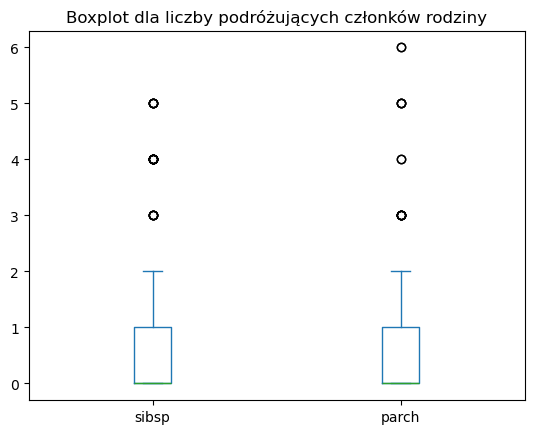

In [490]:
df[['sibsp', 'parch']].plot(kind = 'box', title = 'Boxplot dla liczby podróżujących członków rodziny');

#### Wartości odstające dla wieku pasażerów

* znalazły się również dwie osoby w podeszłym wieku (powyżej 70 lat), które stanowią wartości odstające.

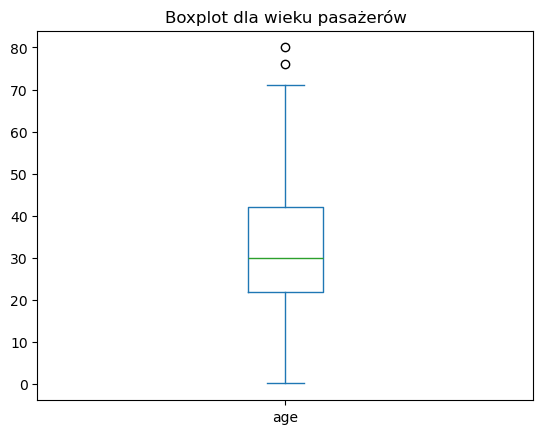

In [489]:
df['age'].plot(kind = 'box', title = 'Boxplot dla wieku pasażerów');

#### Wartości odstające dla cen biletów

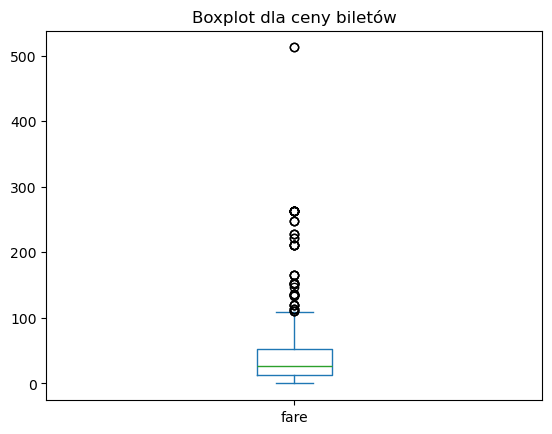

In [493]:
df['fare'].plot(kind = 'box', title = 'Boxplot dla ceny biletów');

#### 10 najczęściej występujących cen biletów

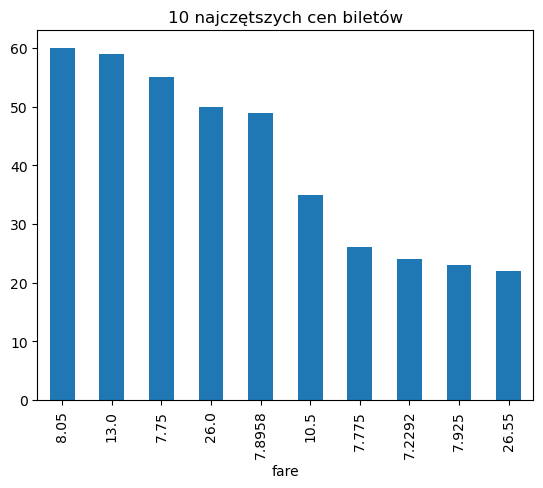

In [171]:
#najczęstsze ceny biletów
top_fare = df['fare'].value_counts().head(10)
top_fare_plot = top_fare.plot(kind = 'bar', xlabel = 'fare', title = '10 najczętszych cen biletów')

#### 10 najdroższych cen biletów

In [21]:
#sprawdzam 10 najdroższych biletów
expensive_tickets_df = df.nlargest(10, 'fare')

# Wybierz tylko kolumnę 'fare'
fare_column = expensive_tickets_df[['fare']]

# Konwertuj tę kolumnę na HTML bez indeksów
html = fare_column.to_html(index=False)

# Wyświetl HTML
HTML(html)

fare
512.3292
512.3292
512.3292
512.3292
263.0000
263.0000
263.0000
263.0000
263.0000
263.0000


#### Zależności pomiędzy cenami biletów w różnych klasach

In [201]:
#pokazuję zależności pomiędzy cenami biletów w różnych klasach
df[['pclass','fare']].groupby('pclass').agg(['min', 'max', 'mean', 'median'])

fare                              
        min       max       mean   median
pclass                                   
1.0     0.0  512.3292  87.508992  60.0000
2.0     0.0   73.5000  21.179196  15.0458
3.0     0.0   69.5500  13.302889   8.0500

### Podsumowanie analizy wartości odstających:
* dla ceny biletów występuje najwięcej wartości odstających, co również nie jest zdziwieniem -> większość ludzi podróżowało z najtańszymi biletami: od 7.22 dolarów po 26.55 dolarów,
* jednak znalazły się osoby z klasy 1, które za bilety zapłaciły dużo więcej dla oferowanych w cenie luksusów (na pokładzie statku znalazły się znane osobistości, takie jak: Benjamin Guggenheim, Isidor Strauss czy Jan Jakub Astor IV z żoną - to głównie tego pokroju ludzie stanowią w tym przypadku wartości odstające),
* 10 najdroższych biletów kosztowało od 263 do nawet 512 dolarów.
* wartości odstające wystąpiły głównie dla różnorodnych cen biletu - pasażerowie 1 klasy mieli dużo możliwości do wyboru pod kątem oferowanych luksusów, stąd taka rozbieżność cenowa w biletach, dostosowana do poszczególnych zamożnych klientów.

## Wnioski końcowe
**Przeanalizowano dane związane z rejsem statkiem 'Titanic', który miał być najbardziej prestiżowy, a feralnie okazał się jedną z największych katastrof morskich w dziejach ludzkości. Dane dotyczyły m.in.: pasażerów, cen biletów, ocalałych lub miejsc docelowych, do których kierowali się pasażerowie. Dokonując analizy EDA wysnuto następujące wnioski:**
* tylko 38% pasażerów przeżyło katastrofę,
* tylko 15% ciał zostało odnalezionych,
* najwięcej podróżujących było ludzi młodych, w klasie 3, bez rodziny,
* najbardziej rozmaite były ceny biletów, których średnia pomiędzy 2 a 3 klasą oscylowała od 13 do 21 dolarów, natomiast w 1 klasie wynosiła aż 87 dolarów (przy czym najdroższe bilety wahały się: od 247 do 512 dolarów),
* najważniejszym wnioskiem jest fakt, że pomimo iż śmierć jest egalitarna wobec wszystkich (zarówno bogatych i biednych), to jednak w tym przypadku posiadając 1 klasę - miało się 45% szans na przeżycie w stosunku do zaledwie 21% w klasie 3).

**Niestety na pokładzie statku znajdowało się jedynie 20 szalup ratunkowych, które mogło pomieścić zaledwie 53% pasażerów. Dlatego też największą przeżywalność wykazali pasażerowie z klasy 1, którzy mieli większy priorytet w ewakujacji na łodzie ratunkowe (aniżeli członkowie 2 lub 3 klasy).
Gdyby tak naprawdę łodzi ratunkowych było tyle ile potrzeba - być może nie wspominalibyśmy teraz tego wydarzenia jako jedna z największych tragedii ludzkich w naszej historii.**